In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import mne
from mne.preprocessing import ICA
import numpy as np


In [2]:

def dataset_maker_custom(file_path:str,exclude:list,low_f:float,high_f:float,minute):
    bdf_file = file_path
    raw = mne.io.read_raw_bdf(bdf_file,preload=True)
    channels_to_eliminate = raw.ch_names[-2:] # Last two channels are trash. Should be discarded.
    raw = raw.copy().pick_types(eeg=True, exclude=channels_to_eliminate)
    raw.rename_channels({'Fp1-A1': 'Fp1',
                        'Fp2-A2': 'Fp2',
                        'F3-A1':'F3',
                        'F4-A2':'F4',
                        'C3-A1':'C3',
                        'C4-A2': 'C4',
                        'P3-A1': 'P3',
                        'P4-A2': 'P4',
                        'O1-A1': 'O1',
                        'O2-A2':'O2',
                        'F7-A1':'F7',
                        'F8-A2':'F8',
                        'T3-A1':'T3',
                        'T4-A2':'T4',
                        'T5-A1':'T5',
                        'T6-A2':'T6'})
    raw.set_montage("standard_1020")
    raw.filter(l_freq=low_f, h_freq=high_f) 
    
    ica = ICA(n_components=16, random_state=97, max_iter="auto",method='fastica')
    ica.fit(raw)
    ica.plot_components()
    raw.plot(duration=100)
    ica.exclude = exclude
    
    ica.apply(raw)
    raw.plot(duration=100)
    data = raw[::][0] 
    
    data = [single_data[400:] for single_data in data]
    
    data = torch.Tensor(np.array(data))
    new_data = []
    collected_data_count = 0
    for i in range(0, data.shape[1], 400):
   
        if collected_data_count >= minute*10:
            break  
        collected_data = data[:, i:i + 300]#200 + 100
        new_data.append(collected_data)
        collected_data_count += 1
    final_tensor = torch.stack(new_data, dim=0) 
    return final_tensor


Extracting EDF parameters from /Users/axion66/coding/neuro_ai/data/rgb.BDF...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121799  =      0.000 ...  1217.990 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (330.010 s)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 20.5

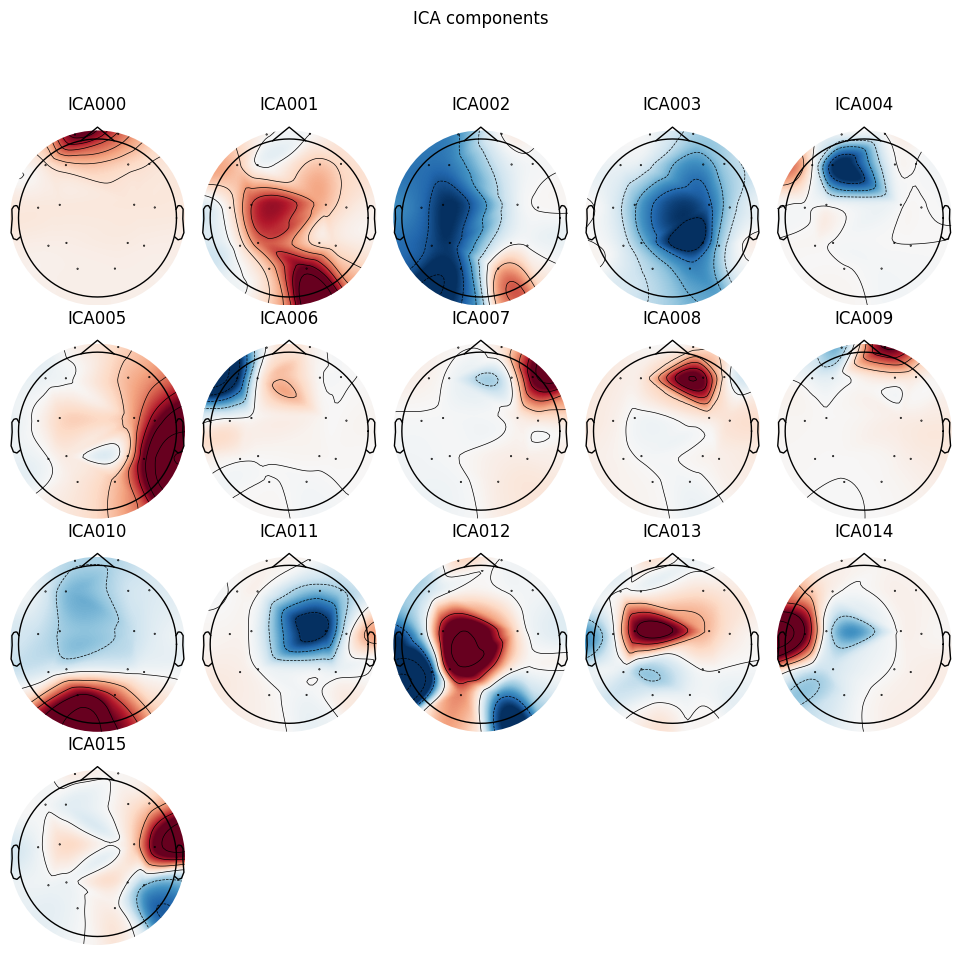

Using matplotlib as 2D backend.


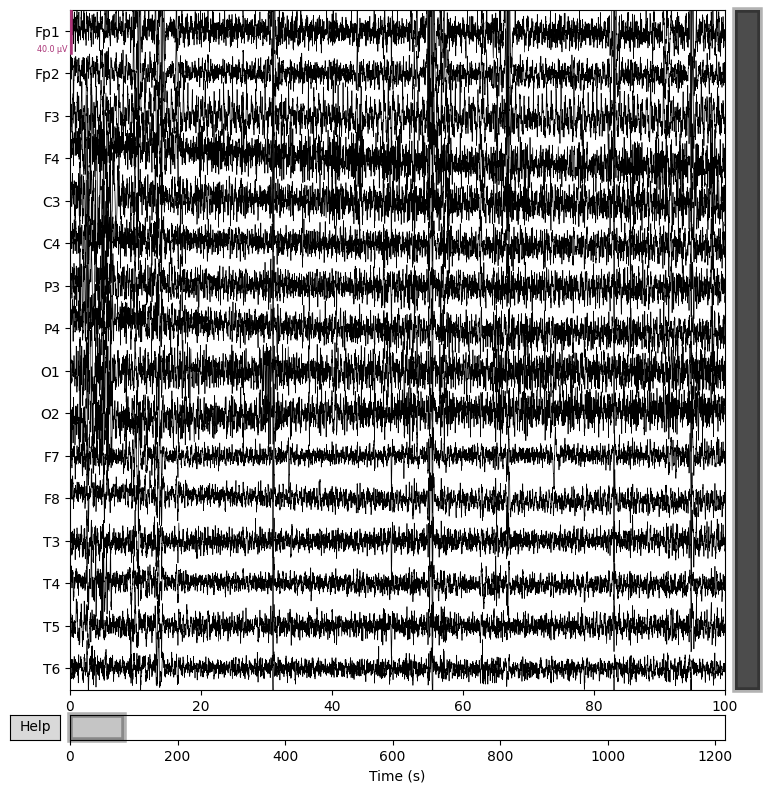

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 1 ICA component
    Projecting back using 16 PCA components


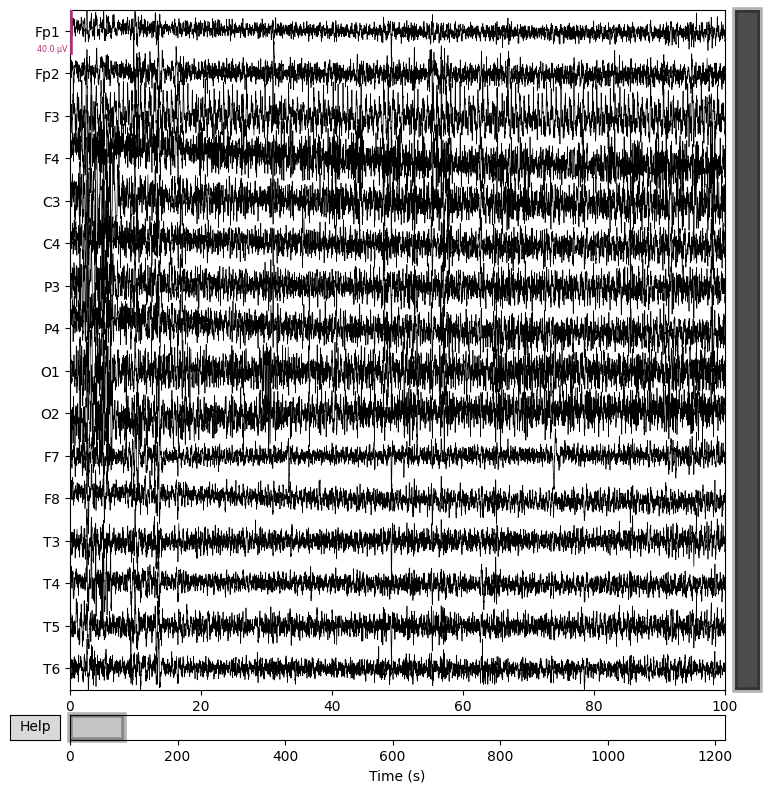

torch.Size([300, 16, 300])


In [3]:

data = dataset_maker_custom('data/rgb.BDF',[0],0.01,40,30)
print(data.shape)

In [4]:
word_list = [# didn't include "none" and "none2" as those are excluded during the process of preprocessing.
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             ]

new_word_list = []
for idx,i in enumerate(word_list):
    if idx%2 == 0:
        if (i == '빨강'):
            
            new_word_list.append(0)
        elif (i == '초록'):
            new_word_list.append(1)
        elif (i == '파랑'):
            new_word_list.append(2)
        else:
            print("ERROR!")
            raise Exception("ERROR!")
print(len(new_word_list))
print(new_word_list)

new_word_list = torch.tensor(new_word_list).to(dtype=torch.long)
#shape = (300,)

300
[0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2]


EPOCH: 1 / 100000, loss: 1.1095094680786133
EPOCH: 2 / 100000, loss: 1.094926118850708
EPOCH: 3 / 100000, loss: 1.0800750255584717
EPOCH: 4 / 100000, loss: 1.1678751707077026
EPOCH: 5 / 100000, loss: 1.1091145277023315
EPOCH: 6 / 100000, loss: 1.1817723512649536
EPOCH: 7 / 100000, loss: 1.2098780870437622
EPOCH: 8 / 100000, loss: 1.1092524528503418
EPOCH: 9 / 100000, loss: 1.0517243146896362
EPOCH: 10 / 100000, loss: 1.1940791606903076
EPOCH: 11 / 100000, loss: 1.0525215864181519
EPOCH: 12 / 100000, loss: 1.2076557874679565
EPOCH: 13 / 100000, loss: 1.1089833974838257
EPOCH: 14 / 100000, loss: 1.1783579587936401
EPOCH: 15 / 100000, loss: 1.204952597618103
EPOCH: 16 / 100000, loss: 1.0381333827972412
EPOCH: 17 / 100000, loss: 1.0521209239959717
EPOCH: 18 / 100000, loss: 1.1346722841262817
EPOCH: 19 / 100000, loss: 1.0532265901565552
EPOCH: 20 / 100000, loss: 1.0676828622817993
EPOCH: 21 / 100000, loss: 1.147204041481018
EPOCH: 22 / 100000, loss: 1.1476383209228516
EPOCH: 23 / 100000, lo

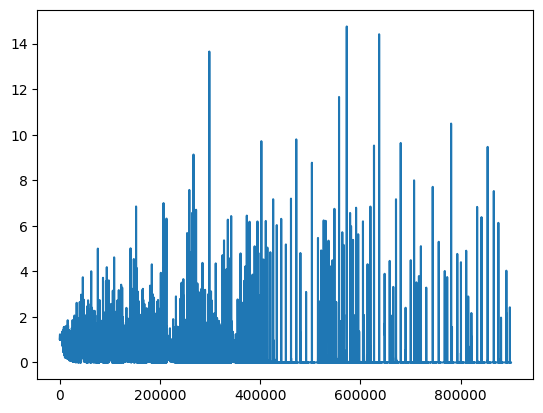

In [22]:
from utils_neuro import *
from models import *
import librosa
spectrogram = []
for i in range(data.shape[0]):
    j_spec = []
    for j in range(data.shape[1]):
        signal = np.array(data[i,j,:])
        
        signal = librosa.stft(signal,n_fft=1024,hop_length=512)
        signal = librosa.amplitude_to_db(np.abs(signal), ref=np.max)
        signal = torch.from_numpy(signal)
        signal = signal.squeeze(-1)
        j_spec.append(signal)
    j_spec = torch.stack(j_spec)
    spectrogram.append(j_spec)
spectrogram = torch.stack(spectrogram)
    

dSET = dataset(spectrogram[0:70],new_word_list[0:70])
dLoader = DataLoader(dSET,batch_size=8,shuffle=True)

class modelNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.LSTM(16,32)
        self.layer2 = nn.LSTM(32,64)
        self.fc1 = nn.Sequential(
            nn.Linear(64,32),
            nn.GELU(),
            nn.Linear(32,16),
            nn.GELU(),
            nn.Linear(16,8),
            nn.GELU(),
            nn.Linear(8,3)
        )
    def forward(self,x):
        x = x.permute(0,2,1)#from (b,c,l) to (b,l,c)
        x,_ = self.layer1(x)
        x,_ = self.layer2(x)
        x = x[:,-1,:]
        x = self.fc1(x)
        return x
    
model = modelNN()
optimizer = optim.Adam(model.parameters(),lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

losses = []
EPOCH = 1000000
for i in range(EPOCH):
    
    for d,l in dLoader:
        optimizer.zero_grad()
        output = model(d)
        loss = loss_fn(output.float(),l.long())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
    print(f"EPOCH: {i+1} / {EPOCH}, loss: {losses[-1]}")

torch.save(model,"100000specmodel.pt")
plt.plot(losses)
plt.show()


In [23]:
model.eval()
dSET2 = dataset(data[70:-1],new_word_list[70:-1])
dLoader2 = DataLoader(dSET2,batch_size=1,shuffle=False)

with torch.no_grad():
    for d,l in dLoader2:
        output = model(d)
        print(output)
        print(l)
        print("END!")

model.train()

tensor([[ 6.1598, -3.2979, -4.9384]])
tensor([2])
END!
tensor([[ 6.1600, -3.2980, -4.9386]])
tensor([1])
END!
tensor([[ 6.1597, -3.2978, -4.9384]])
tensor([0])
END!
tensor([[ 6.1596, -3.2978, -4.9384]])
tensor([1])
END!
tensor([[ 6.1597, -3.2978, -4.9384]])
tensor([2])
END!
tensor([[ 6.1598, -3.2979, -4.9385]])
tensor([1])
END!
tensor([[ 6.1596, -3.2978, -4.9383]])
tensor([0])
END!
tensor([[ 6.1598, -3.2979, -4.9385]])
tensor([2])
END!
tensor([[ 6.1596, -3.2977, -4.9383]])
tensor([0])
END!
tensor([[ 6.1596, -3.2978, -4.9384]])
tensor([2])
END!
tensor([[ 6.1600, -3.2980, -4.9388]])
tensor([1])
END!
tensor([[ 6.1599, -3.2979, -4.9386]])
tensor([0])
END!
tensor([[ 6.1598, -3.2978, -4.9385]])
tensor([1])
END!
tensor([[ 6.1599, -3.2980, -4.9385]])
tensor([2])
END!
tensor([[ 6.1598, -3.2979, -4.9385]])
tensor([1])
END!
tensor([[ 6.1596, -3.2978, -4.9383]])
tensor([0])
END!
tensor([[ 6.1599, -3.2979, -4.9386]])
tensor([2])
END!
tensor([[ 6.1598, -3.2979, -4.9385]])
tensor([0])
END!
tensor([[ 

modelNN(
  (layer1): LSTM(16, 32)
  (layer2): LSTM(32, 64)
  (fc1): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=8, out_features=3, bias=True)
  )
)